In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Roaddata.csv")
df = df.rename(columns=lambda x: x.strip())

df_info = df.info()
df_head = df.head()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Year           34 non-null     int64
 1   Ashanti        34 non-null     int64
 2   Brong Ahafo    34 non-null     int64
 3   Central        34 non-null     int64
 4   Eastern        34 non-null     int64
 5   Greater Accra  34 non-null     int64
 6   Northern       34 non-null     int64
 7   Upper East     34 non-null     int64
 8   Upper West     34 non-null     int64
 9   Volta          34 non-null     int64
 10  Western        34 non-null     int64
dtypes: int64(11)
memory usage: 3.0 KB


,Year,Ashanti,Brong Ahafo,Central,Eastern,Greater Accra,Northern,Upper East,Upper West,Volta,Western
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,2007.500000,2954.294118,1182.117647,1552.000000,2596.647059,3349.882353,521.470588,227.588235,163.823529,1033.882353,1181.882353
std,9.958246,856.304977,375.519823,342.628874,393.301864,878.609017,235.513139,61.624532,51.450753,313.813085,187.830640
min,1991.000000,1141.000000,481.000000,850.000000,1588.000000,1703.000000,86.000000,132.000000,76.000000,346.000000,707.000000
25%,1999.250000,2386.250000,922.750000,1330.500000,2363.750000,2650.000000,309.750000,197.250000,127.000000,765.750000,1083.000000
50%,2007.500000,3315.000000,1144.500000,1552.000000,2585.500000,3493.000000,559.000000,223.000000,147.000000,1139.000000,1138.500000
75%,2015.750000,3672.750000,1514.000000,1781.000000,2884.000000,3934.000000,739.000000,264.000000,207.000000,1232.000000,1303.000000
max,2024.000000,3969.000000,1847.000000,2193.000000,3583.000000,4971.000000,841.000000,339.000000,269.000000,1828.000000,1566.000000


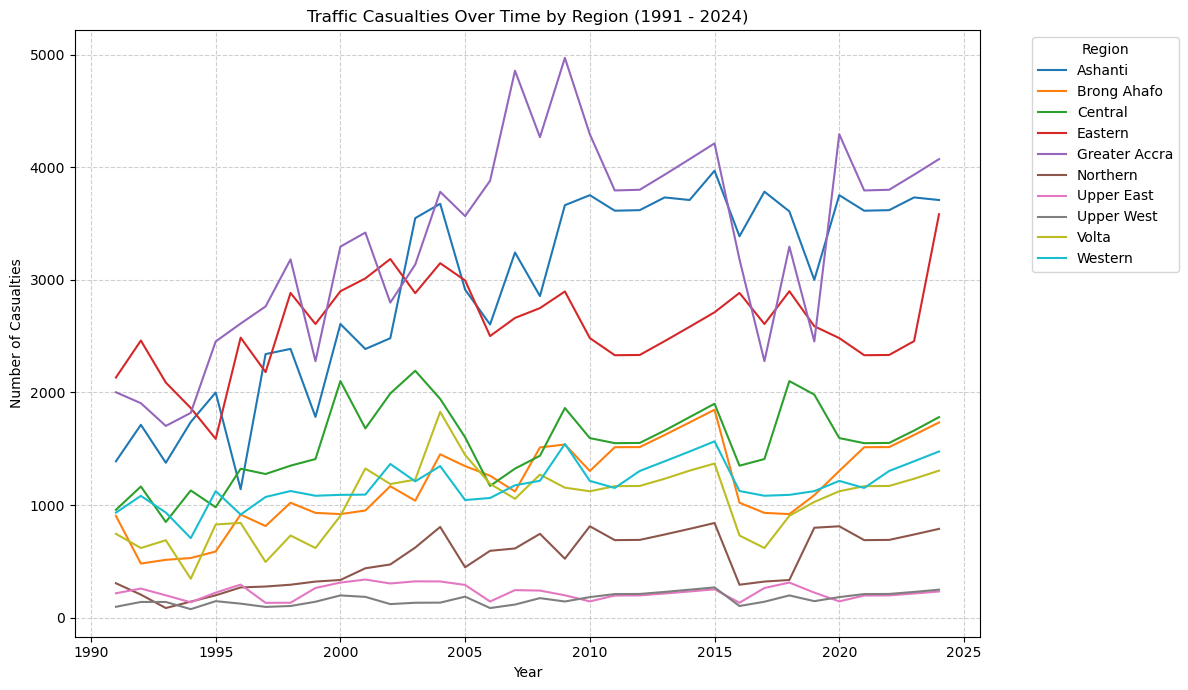

In [6]:
df_melted = df.melt(id_vars="Year", var_name="Region", value_name="Casualties")
df_melted["Region"] = df_melted["Region"].str.title().str.strip()

plt.figure(figsize=(12, 7))
for region in df_melted["Region"].unique():
    region_data = df_melted[df_melted["Region"] == region]
    plt.plot(region_data["Year"], region_data["Casualties"], label=region)

plt.title("Traffic Casualties Over Time by Region (1991 - 2024)")
plt.xlabel("Year")
plt.ylabel("Number of Casualties")
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

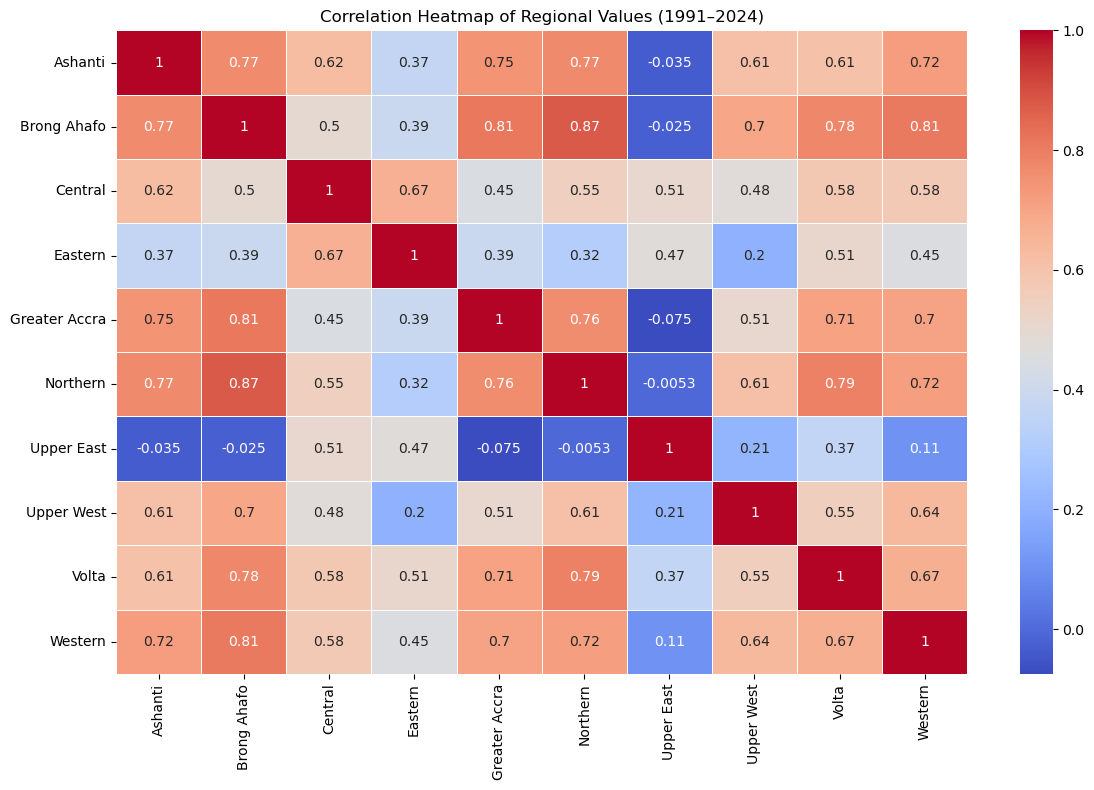

In [7]:
df = df.rename(columns=lambda x: x.strip())  

correlation_matrix = df.drop(columns=["Year"]).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Regional Values (1991–2024)")
plt.tight_layout()
plt.show()

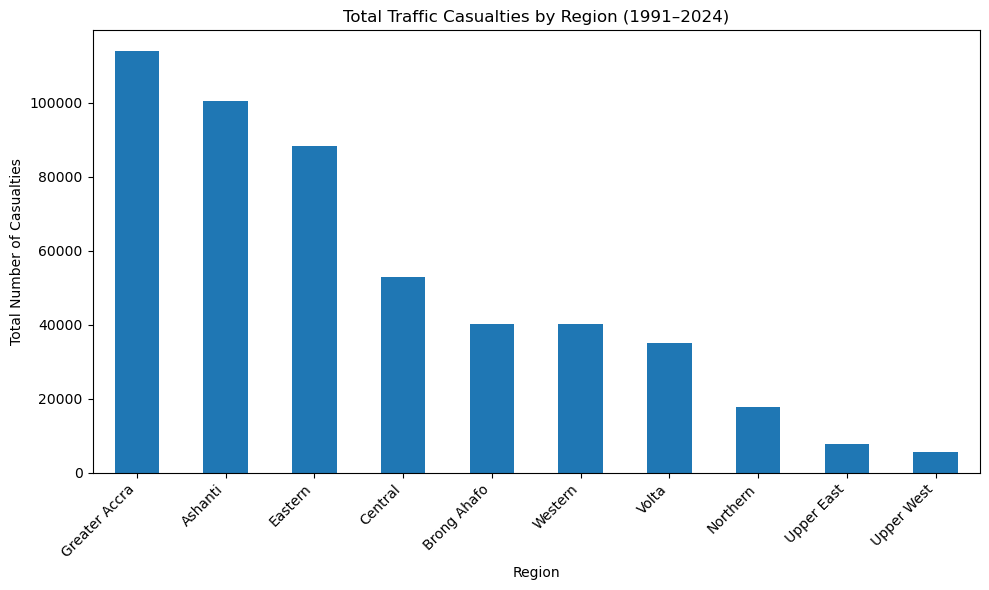

In [8]:
total_casualties_per_region = df.drop(columns=["Year"]).sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
total_casualties_per_region.plot(kind="bar")
plt.title("Total Traffic Casualties by Region (1991–2024)")
plt.xlabel("Region")
plt.ylabel("Total Number of Casualties")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

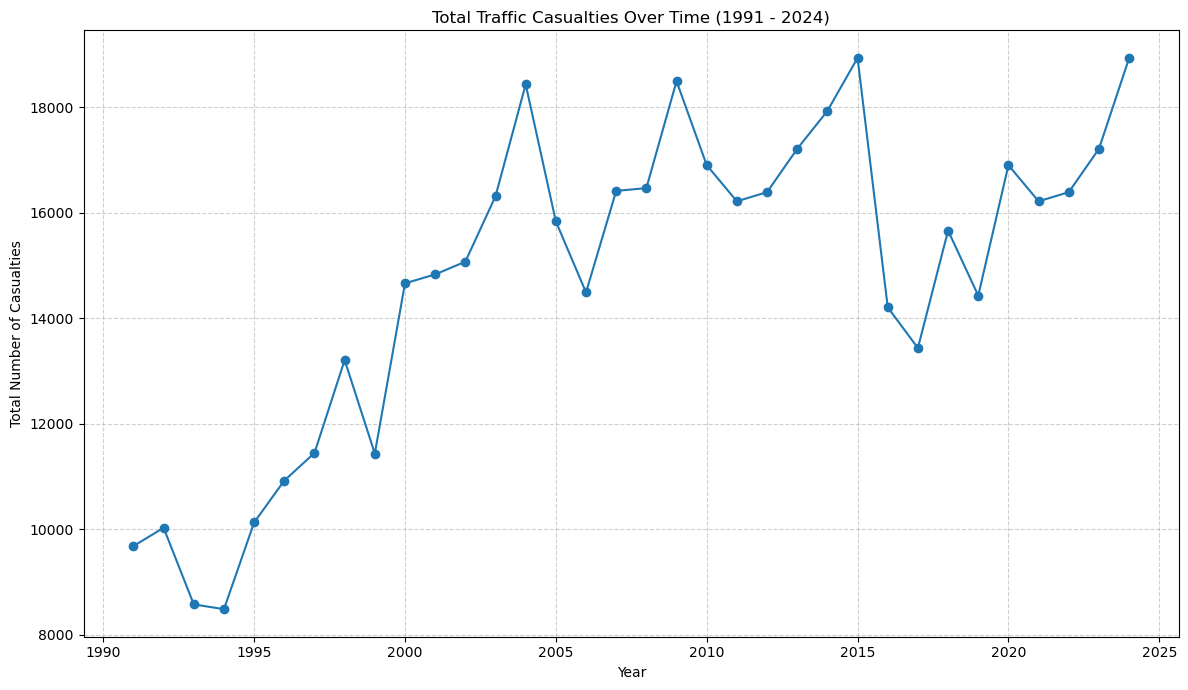

In [9]:
df_melted = df.melt(id_vars="Year", var_name="Region", value_name="Casualties")
yearly_total_casualties = df_melted.groupby("Year")["Casualties"].sum().reset_index()

plt.figure(figsize=(12, 7))
plt.plot(yearly_total_casualties["Year"], yearly_total_casualties["Casualties"], marker='o')
plt.title("Total Traffic Casualties Over Time (1991 - 2024)")
plt.xlabel("Year")
plt.ylabel("Total Number of Casualties")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

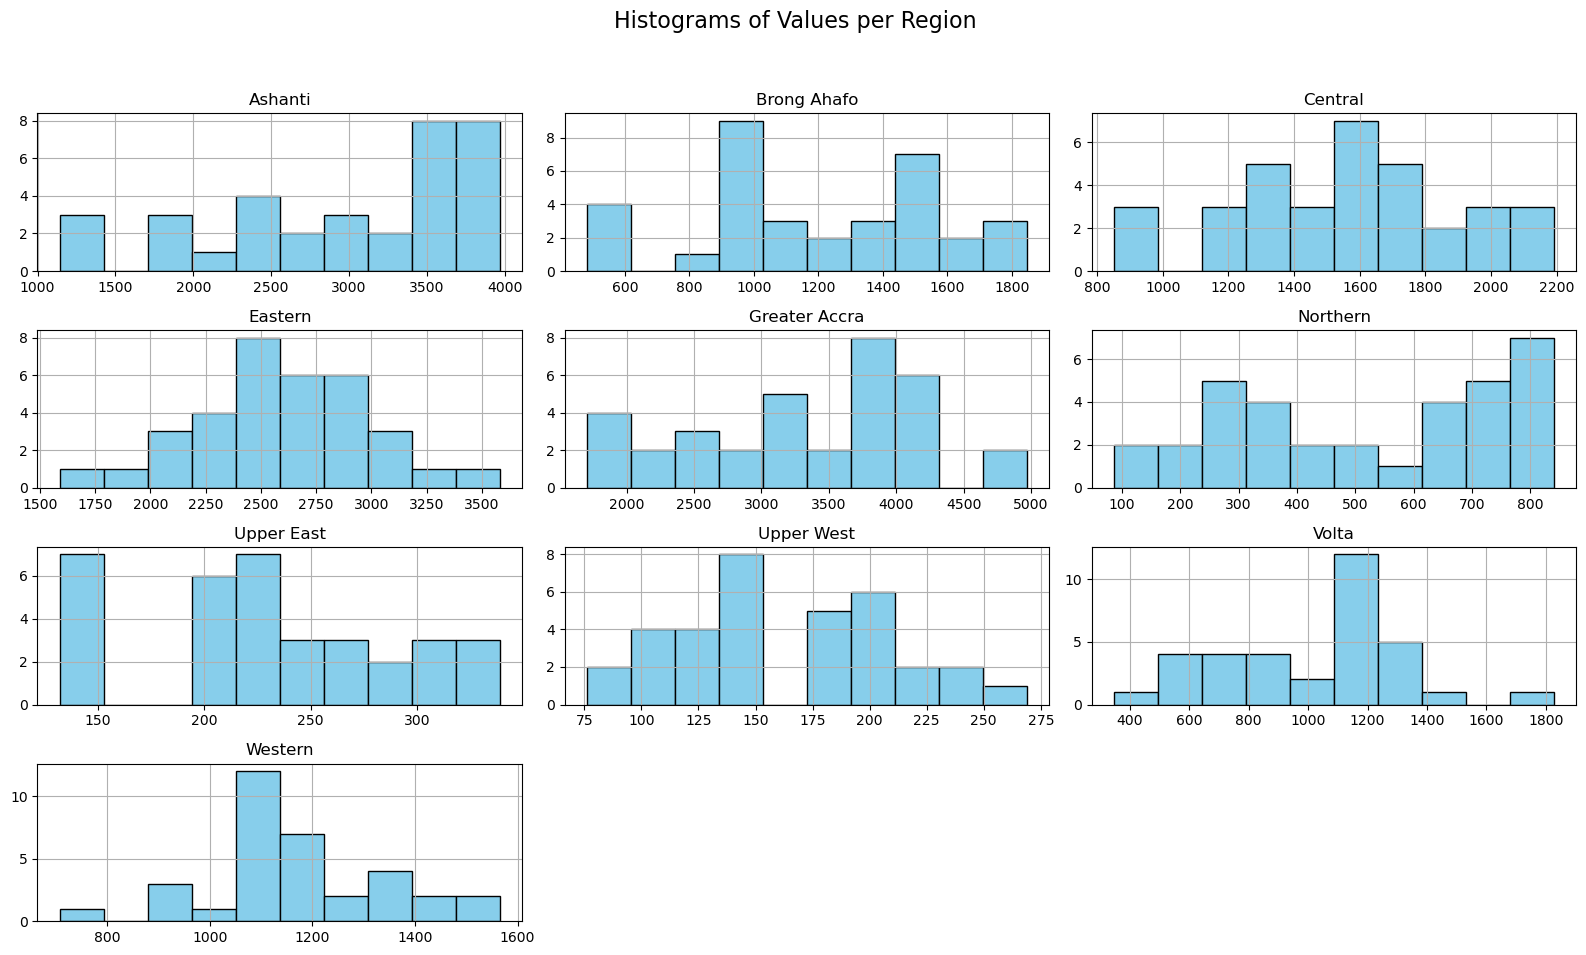

In [10]:
df_cleaned = df.rename(columns=lambda x: x.strip()) 

df_cleaned.drop(columns=["Year"]).hist(bins=10, figsize=(16, 10), layout=(4, 3), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Values per Region", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [11]:
import geopandas as gpd
region_means = df.drop(columns=["Year"]).mean().reset_index()
region_means.columns = ["Region", "Average"]
region_means["Region"] = region_means["Region"].str.title().str.strip()

ghana_geojson_url = "/content/sample_data/gh.json"
ghana_map = gpd.read_file(ghana_geojson_url)

ghana_map["Region"] = ghana_map["name"].str.title().str.strip()

ghana_merged = ghana_map.merge(region_means, on="Region", how="left")

ax = ghana_merged.plot(column="Average", cmap="YlOrRd", legend=True, edgecolor='black', linewidth=0.8)
ax.set_title("Annual Distribution of Traffic Casualties by Region (1991–2024)", fontsize=14)
ax.axis("off")
plt.tight_layout()
plt.show()

ModuleNotFoundError: No module named 'geopandas'